# 1. Descriptive statisics

## 1.1. Basic statistics

In [1]:
import numpy as np

In [2]:
np.random.seed(0)
sample = np.random.randint(100, 1000, size=100)
sample

array([784, 659, 729, 292, 935, 863, 807, 459, 109, 823, 377, 854, 904,
       699, 170, 572, 700, 496, 414, 805, 586, 651, 187, 274, 700, 949,
       777, 637, 945, 172, 877, 215, 855, 809, 947, 531, 548, 950, 199,
       277, 855, 897, 759, 247, 523, 388, 365, 797, 739, 644, 643, 814,
       344, 251, 775, 610, 559, 982, 283, 128, 902, 228, 228, 153, 650,
       588, 856, 373, 435, 488, 717, 142, 542, 643, 988, 357, 421, 157,
       391, 970, 219, 879, 530, 182, 191, 996, 498, 711, 665, 733, 184,
       303, 424, 874, 147, 739, 231, 968, 280, 946])

In [3]:
sample.min()

109

In [4]:
sample.max()

996

The [mean](https://en.wikipedia.org/wiki/Arithmetic_mean) (denoted $\mu$) or the [expected value](https://en.wikipedia.org/wiki/Expected_value) (denoted $\mathbb{E}[\mathbf{x}]$) of a variable $\mathbf{x}=(x_1,x_2,\dots,x_N)$ is calculated by the formula:

$$\mu = \frac{1}{N} \sum_{n=1}^{N}{x_n}$$

In [5]:
sample.sum()

57069

In [6]:
sample.mean()

570.69

## 1.2. Variance
The [variance](https://en.wikipedia.org/wiki/Variance) of a random variable $\mathbf{x}$ is defined as:
$$\sigma^2 = \frac{1}{N}\sum_{n=1}^N{(x_n - \mu)}^2$$
where:
- $\sigma$ is the [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) of $\mathbf{x}$
- $\sigma^2$ is the variance of $\mathbf{x}$
- $\mu$ is the mean of $\mathbf{x}$
- $N$ is the size of $\mathbf{x}$
- $x_n$ is the $n^{th}$ observation

In [7]:
import numpy as np

In [8]:
np.random.seed(0)
sample = np.random.randint(100, 1000, size=100)
sample

array([784, 659, 729, 292, 935, 863, 807, 459, 109, 823, 377, 854, 904,
       699, 170, 572, 700, 496, 414, 805, 586, 651, 187, 274, 700, 949,
       777, 637, 945, 172, 877, 215, 855, 809, 947, 531, 548, 950, 199,
       277, 855, 897, 759, 247, 523, 388, 365, 797, 739, 644, 643, 814,
       344, 251, 775, 610, 559, 982, 283, 128, 902, 228, 228, 153, 650,
       588, 856, 373, 435, 488, 717, 142, 542, 643, 988, 357, 421, 157,
       391, 970, 219, 879, 530, 182, 191, 996, 498, 711, 665, 733, 184,
       303, 424, 874, 147, 739, 231, 968, 280, 946])

In [9]:
# standard deviation
sample.std()

270.7422647094465

In [10]:
# variance
sample.var()

73301.37389999999

### Unbiased variance
In many practical situations, $\mathbf{x}$ is just a sample and the true variance of the whole population is unknown. $\sigma_{\mathbf{x}}^2$ in this case is an [biased estimator](https://en.wikipedia.org/wiki/Bias_of_an_estimator), it usually underestimates the population variance. Correting for this bias yields:

$$\hat{\sigma}^2 = \frac{1}{N-1}\sum_{n=1}^N{(x_n - \mu)}^2$$

The use of the term $N-1$ is under [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction). The quantity $1$ subtracted from $N$ is the [degrees of freedom](https://en.wikipedia.org/wiki/Degrees_of_freedom_(statistics)).

In [11]:
sample.var(ddof=1)

74041.79181818181

### Variance and mean
The following formula demonstrates the relationship between the mean and the variance:

$$\sigma^2 = E\left[(\mathbf{x} - E[\mathbf{x}])^2\right] = E[\mathbf{x}^2] - E[\mathbf{x}]^2$$

In [12]:
np.mean(sample**2) - np.mean(sample)**2

73301.37389999995

### Visualization of variance
Standard deviation and variance show how spread out numbers are.

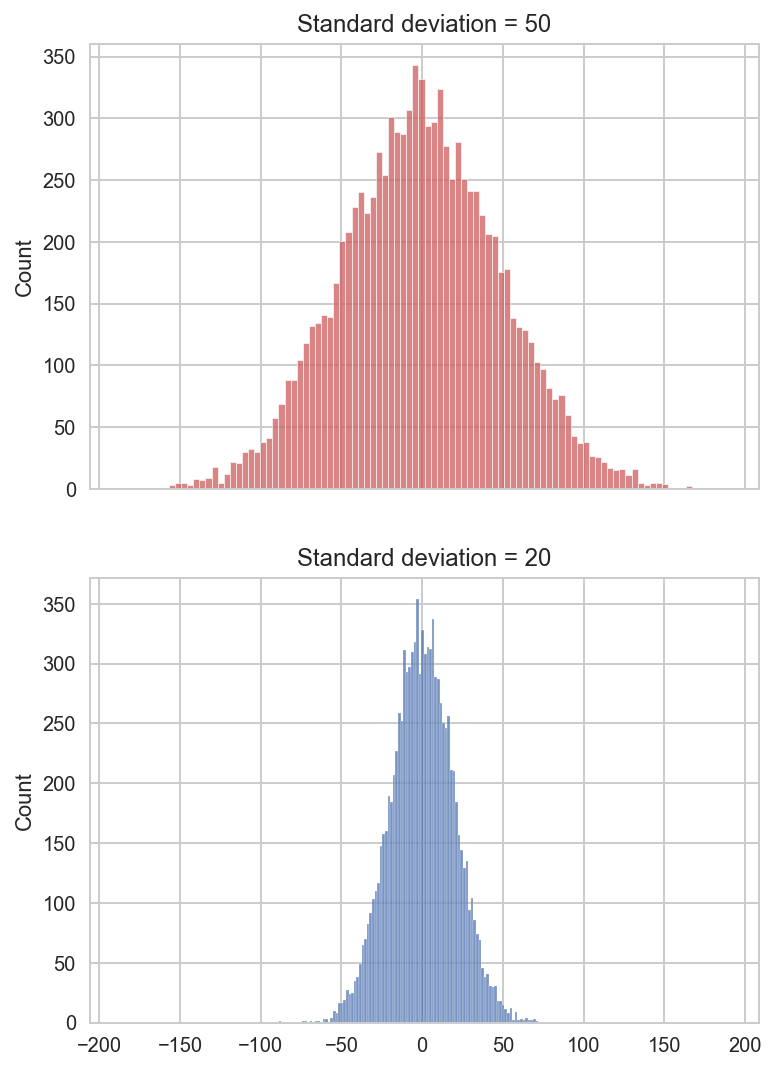

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(6,9))

std_1 = 50
sample_1 = np.random.normal(loc=0, scale=std_1, size=10000)
sns.histplot(sample_1, bins=100, ax=ax[0], stat='count', edgecolor='w', color='indianred')
ax[0].set_title(f'Standard deviation = {std_1}')

std_2 = 20
sample_2 = np.random.normal(loc=0, scale=std_2, size=10000)
sns.histplot(sample_2, bins=100, ax=ax[1], stat='count', edgecolor='w')
ax[1].set_title(f'Standard deviation = {std_2}')

plt.show()

## 1.3. Skewness
[Skewness](https://en.wikipedia.org/wiki/Skewness) is a measure of the asymmetry of a random variable about its mean. A skewness of $0$ indicates that the variable is symmetrically distributed. There are several approaches for calculating skewness (denoted $\gamma$); however, the Fisher's coefficient is the go-to one:

$$\gamma=\frac{m_3}{m_2^{3/2}}$$

where $\displaystyle{m_i=\frac{1}{N}\sum{(\mathbf{x}-\mu)^i}}$ is the $i^{th}$ [central moment](https://en.wikipedia.org/wiki/Central_moment). In estimating the population skewness, we multiply the biased formula by the factor $\displaystyle{\frac{\sqrt{N(N-1)}}{N-2}}$ where $N$ is the sample size.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

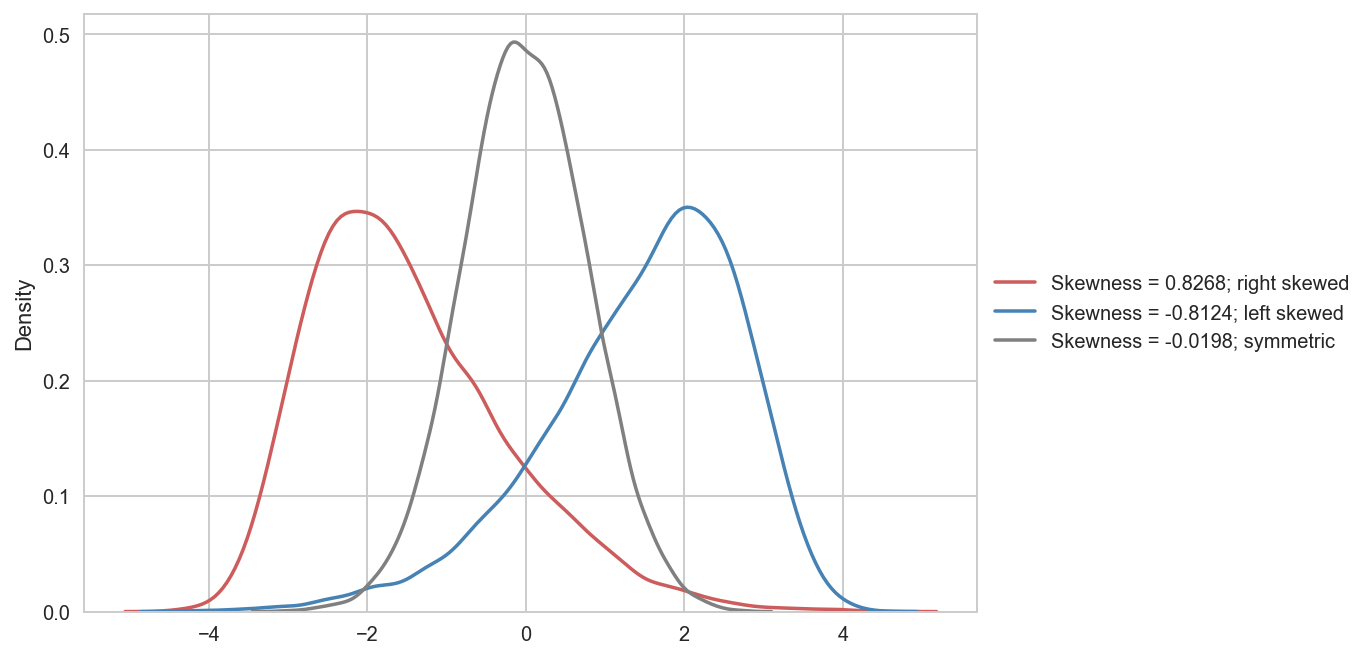

In [15]:
from scipy import stats
sample1 = stats.skewnorm(a=4, loc=-3, scale=2).rvs(size=10000, random_state=7)
sample2 = stats.skewnorm(a=-4, loc=3, scale=2).rvs(size=10000, random_state=7)
sample3 = stats.skewnorm(a=0, loc=0, scale=0.8).rvs(size=10000, random_state=7)

legend = [
    f'Skewness = {stats.skew(sample1):.4f}; right skewed',
    f'Skewness = {stats.skew(sample2):.4f}; left skewed',
    f'Skewness = {stats.skew(sample3):.4f}; symmetric'
]

fig, ax = plt.subplots()
sns.kdeplot(sample1, color='indianred', ax=ax)
sns.kdeplot(sample2, color='steelblue', ax=ax)
sns.kdeplot(sample3, color='grey', ax=ax)
ax.legend(legend, bbox_to_anchor=(1, 0.5), loc='center left')
plt.show()

Note that the side of the skewness refers to the side of the longer tail. In the graph above, the red sample is said to be right skewed since the mass of its distribution is concentrated to the left, leading to a longer right tail.

In [16]:
from scipy.stats import skew
print(skew(sample1))
print(skew(sample2))

0.8267742492928271
-0.8123928593355433


## 1.4. Kurtosis
[Kurtosis](https://en.wikipedia.org/wiki/Kurtosis) is a measure of peakedness of a distribution. The calculation of kurtosis (denoted $\kappa$) is given by Fisher's definition:

$$\kappa=\frac{m_4}{m_2^2}-3$$

where $m_i$ is the $i^{th}$ [central moment](https://en.wikipedia.org/wiki/Central_moment) ($m_2$ is the variance). The quantity $3$ is subtracted from the result to give a skewness of $0$ for a normal distribution. When estimating the population kurtosis, we use the corrected formula:

$$\hat{\kappa}=\frac{N-1}{(N-2)(N-3)}\left[(N+1)\frac{m_4}{m_2^2}-3(N-1)\right]$$

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

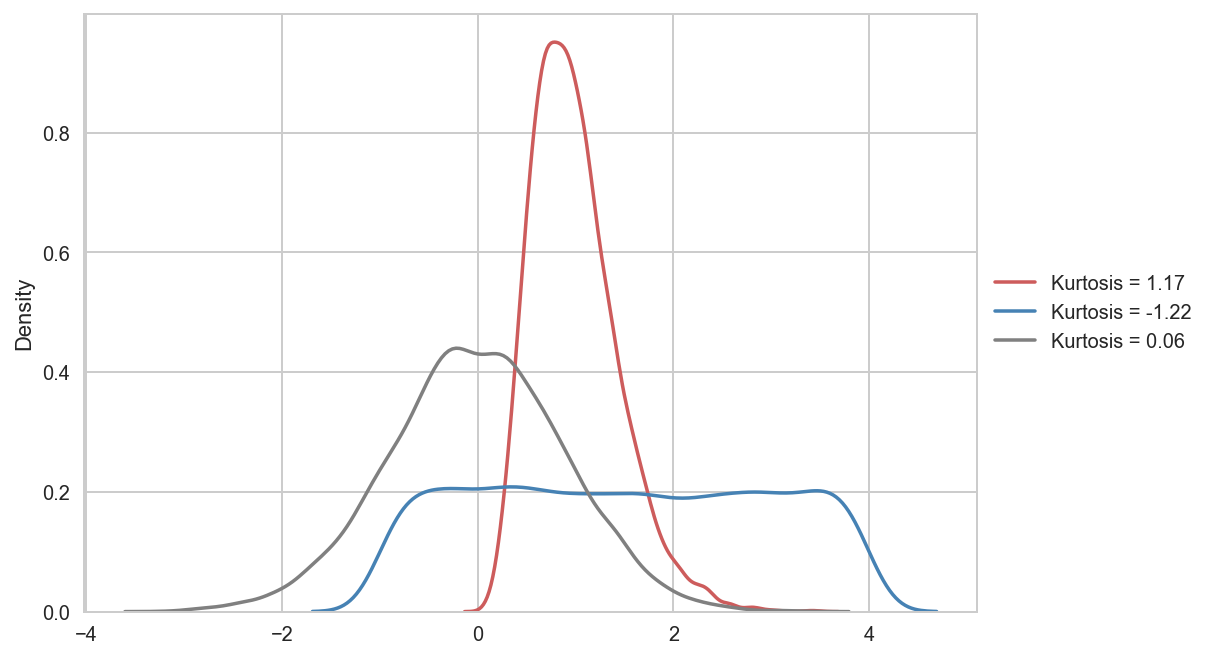

In [18]:
from scipy import stats
d1, d2 = 10, 1000
sample1 = stats.f(d1, d2).rvs(size=10000, random_state=7)
sample2 = stats.uniform(loc=-1, scale=5).rvs(size=10000, random_state=7)
sample3 = stats.norm(0, 0.9).rvs(size=10000, random_state=7)

fig, ax = plt.subplots()
sns.kdeplot(sample1, color='indianred', ax=ax, label=f'Kurtosis = {stats.kurtosis(sample1):.2f}')
sns.kdeplot(sample2, color='steelblue', ax=ax, label=f'Kurtosis = {stats.kurtosis(sample2):.2f}')
sns.kdeplot(sample3, color='gray', ax=ax, label=f'Kurtosis = {stats.kurtosis(sample3):.2f}')
ax.legend(bbox_to_anchor=(1, 0.5), loc='center left')
plt.show()

## 1.5. Quantiles
[Quantiles](https://en.wikipedia.org/wiki/Quantile) are the $q-1$ cut points dividing a set of values into $q$ subsets of equal probability. Some common $q$-quantiles are [median](https://en.wikipedia.org/wiki/Median) ($2$-quantile), [quartiles](https://en.wikipedia.org/wiki/Quartile) ($4$-quantiles), deciles ($10$-quantiles) and [percentiles](https://en.wikipedia.org/wiki/Percentile) ($100$-quantiles).

In [19]:
import numpy as np

In [20]:
np.random.seed(0)
sample = np.random.randint(100, 1000, size=100)
sample

array([784, 659, 729, 292, 935, 863, 807, 459, 109, 823, 377, 854, 904,
       699, 170, 572, 700, 496, 414, 805, 586, 651, 187, 274, 700, 949,
       777, 637, 945, 172, 877, 215, 855, 809, 947, 531, 548, 950, 199,
       277, 855, 897, 759, 247, 523, 388, 365, 797, 739, 644, 643, 814,
       344, 251, 775, 610, 559, 982, 283, 128, 902, 228, 228, 153, 650,
       588, 856, 373, 435, 488, 717, 142, 542, 643, 988, 357, 421, 157,
       391, 970, 219, 879, 530, 182, 191, 996, 498, 711, 665, 733, 184,
       303, 424, 874, 147, 739, 231, 968, 280, 946])

### Median
There are 50% of data points smaller than the median and 50% of data points greater than the median.

In [21]:
np.median(sample)

599.0

### Quartiles
$Q_1$, $Q_2$, $Q_3$ are the 3 quartiles that split our sample into 4 equal parts. There 25% of data points smaller than $Q_1$, 50% of the points smaller than $Q_2$ and 75% points smaller than $Q_3$. Notice that $Q_2$ is also known as the median.

In [22]:
np.quantile(sample, [0.25, 0.5, 0.75])

array([300.25, 599.  , 807.5 ])

In [23]:
# unpacking quartiles
q1, q2, q3 = np.quantile(sample, [0.25, 0.5, 0.75])

A [box plot](https://en.wikipedia.org/wiki/Box_plot) is used to visualize quartiles.

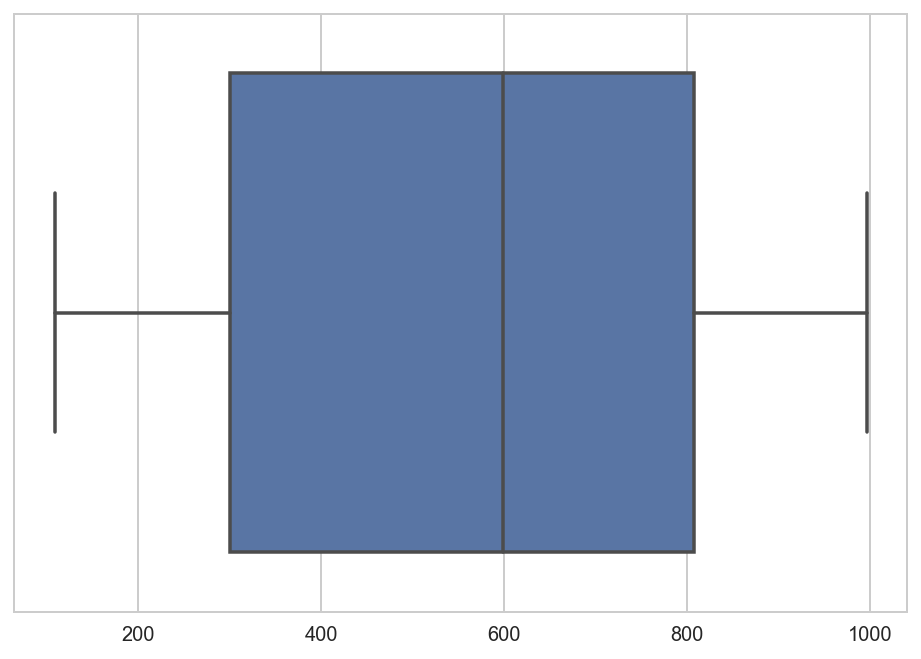

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

np.random.seed(0)
sample = np.random.randint(100, 1000, size=100)
q1, q2, q3 = np.quantile(sample, [0.25, 0.5, 0.75])

sns.boxplot(x=sample)
plt.show()

### Popular quantiles

In [25]:
np.quantile(sample, [0.05, 0.1, 0.2, 0.8, 0.9, 0.95])

array([156.8, 186.7, 269.4, 855. , 936. , 950.9])

## 1.6. Correlation coefficient

### Covariance
First, we calculate the [covariance](https://en.wikipedia.org/wiki/Covariance) (denoted $\sigma_{\mathbf{x},\mathbf{y}}$) of bivariate data, which is a measure of joint variability.

$$\sigma_{\mathbf{x},\mathbf{y}} =
\frac{1}{N} \sum_{n=1}^{N} {(x_n-\mu_\mathbf{x})\cdot (y_n-\mu_\mathbf{y})} =
E[(\mathbf{x}-E[\mathbf{x}])\cdot(\mathbf{y}-E[\mathbf{y}])]
$$

where $E[\mathbf{x}]$ or $E[\mathbf{y}]$ is the expected value of the corresponding variable.

The <code style='font-size:13px;'>numpy.cov()</code> function returns the [covariance matrix](https://en.wikipedia.org/wiki/Covariance_matrix) of $D$ variables: $\mathbf{x}_1,\mathbf{x}_2,\dots,\mathbf{x}_D$.

In [26]:
import numpy as np

In [27]:
np.random.seed(0)
X = np.random.randint(10, 100, size=10)
Y = np.random.randint(10, 100, size=10)
Z = np.random.randint(10, 100, size=10)

In [28]:
np.cov([X, Y, Z])

array([[ 659.16666667, -128.16666667,   93.5       ],
       [-128.16666667,  664.76666667,  -57.1       ],
       [  93.5       ,  -57.1       ,  823.43333333]])

### Correlation coefficient
[Correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) (denoted $\rho_{\mathbf{x},\mathbf{y}}$) is the normalized version of covariance. By using the [Cauchy-Schwarz inequality](https://en.wikipedia.org/wiki/Cauchy–Schwarz_inequality), it's easy to proof that $\rho_{\mathbf{x},\mathbf{y}} \in [-1; 1]$. The closer the coefficient is to either -1 or 1, the stronger the correlation between the two variables.

$$\rho_{\mathbf{x},\mathbf{y}} = \frac{\sigma_{\mathbf{x},\mathbf{y}}}{\sigma_\mathbf{x} \sigma_\mathbf{y}}$$

The <code style='font-size:13px;'>numpy.corrcoef()</code> function returns the correlation coefficient matrix of $D$ variables: $\mathbf{x}_1,\mathbf{x}_2,\dots,\mathbf{x}_D$.

In [29]:
np.random.seed(0)
X = np.random.randint(10, 100, size=10)
Y = np.random.randint(10, 100, size=10)
Z = np.random.randint(10, 100, size=10)

In [30]:
np.corrcoef([X, Y, Z])

array([[ 1.        , -0.19361672,  0.12691115],
       [-0.19361672,  1.        , -0.07717689],
       [ 0.12691115, -0.07717689,  1.        ]])

## 1.7. Probability plots
Probability plots are used to compare the distributions of two datasets. The possible comparing scenarios using probability plots are:
- Comparing two empirical sets
- Comapring a empirical set and a theoretical set
- Comparing two theoretical sets

The most common case is the middle one - when we want to assess whether the observed data comes from a specified distribution.

In [31]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

### P-P plot

[P-P plot](https://en.wikipedia.org/wiki/P–P_plot) (probability-probability plot) is a visualization that plots CDFs of two distributions against each other. If points are on the line ($x=y$) then 2 CDF are the same and observed values is under expected distribution. P-P plot is suitable for comparing probability distributions that have a nearby location because it requires the loc and scale parameters of theoretical distribution.

- In $x$ axis: Estimated cummulative proportions of empirical distribution, given $r_n$ is the rank of observed values

$$\text{PE}=\frac{r_n-0.5}{N}$$

- In $y$ axis: Expected cummulative probabilities of theoretical distribution (CDF corresponding to observed values)

In [32]:
def PPPlot(var, dist):
    from scipy import stats
    var = var.flatten()
    n = len(var)
    pe = (np.arange(1, n+1)-0.5) / n
    pp = np.sort(dist.cdf(var))
    
    fig, ax = plt.subplots(ncols=2, figsize=(10,4), tight_layout=True)
    
    ax[0].plot(np.linspace(0,1), np.linspace(0,1), 'grey')
    ax[0].plot(pe, pp, 'o', color='steelblue', alpha=0.5)
    ax[0].axis('scaled')
    ax[0].set_xlabel('Observed variable')
    ax[0].set_ylabel('Theoretical distribution')
    ax[0].set_title('P-P Plot')
    
    ax[1] = sns.histplot(var, edgecolor='w', kde=True)
    ax[1].set_title('Histogram')
    
    plt.show()

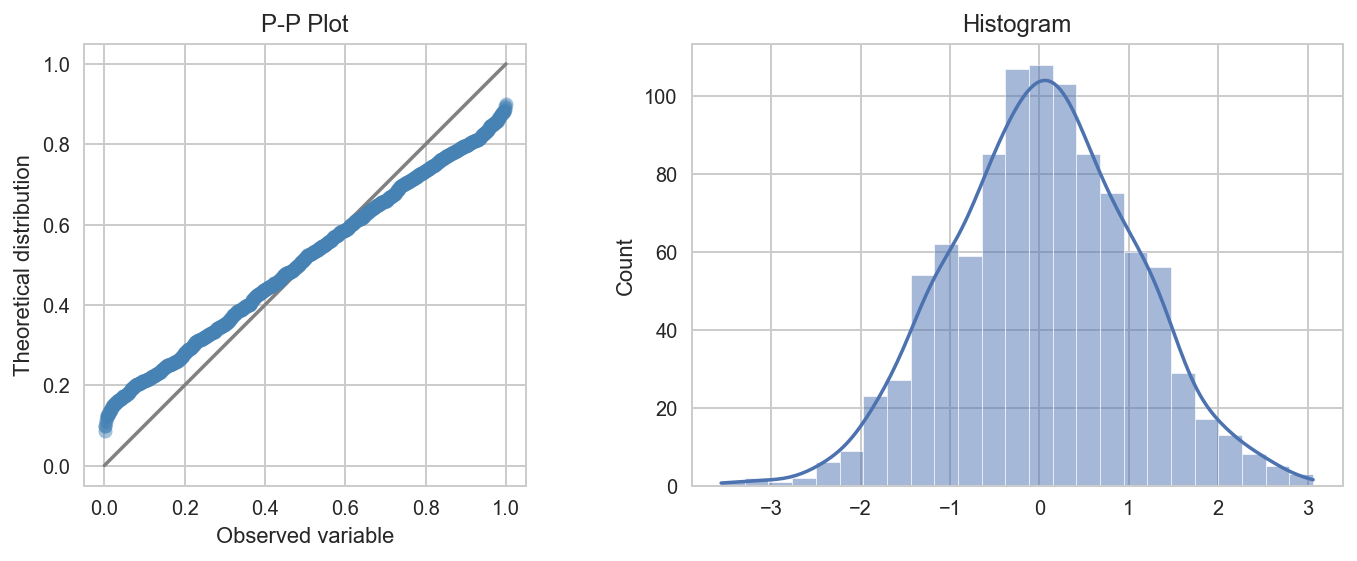

In [33]:
var = stats.norm(loc=0, scale=1).rvs(size=1000, random_state=8)
dist = stats.t(df=1)
PPPlot(var, dist)

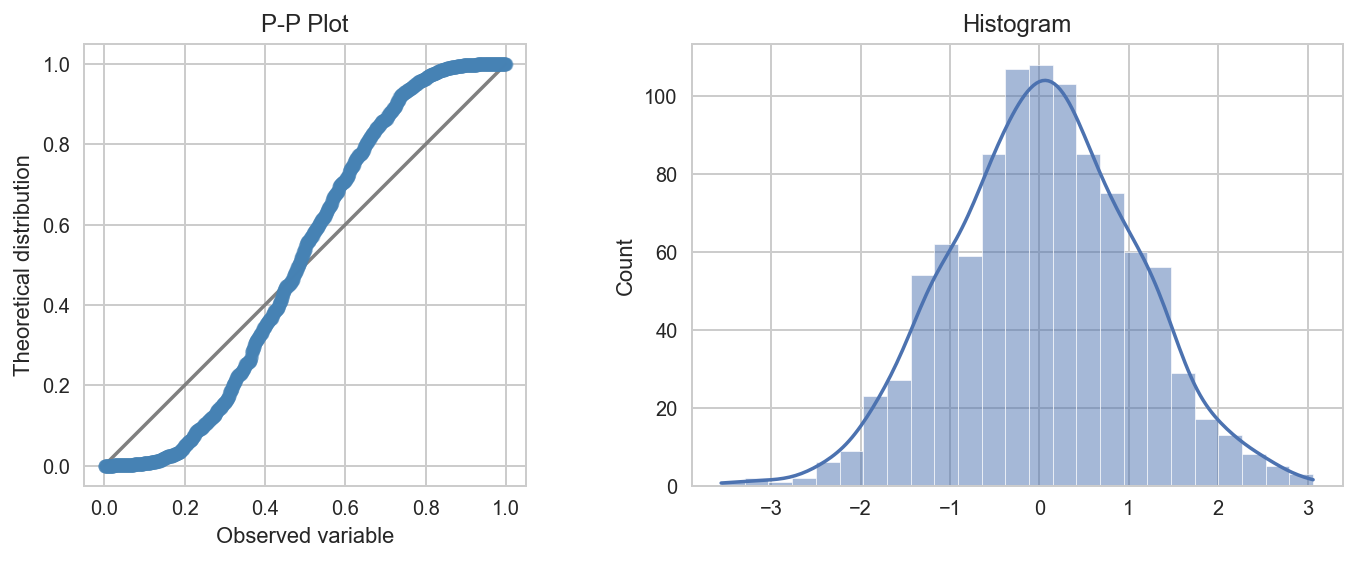

In [34]:
var = stats.norm(loc=0, scale=1).rvs(size=1000, random_state=8)
dist = stats.norm(loc=0, scale=0.5)
PPPlot(var, dist)

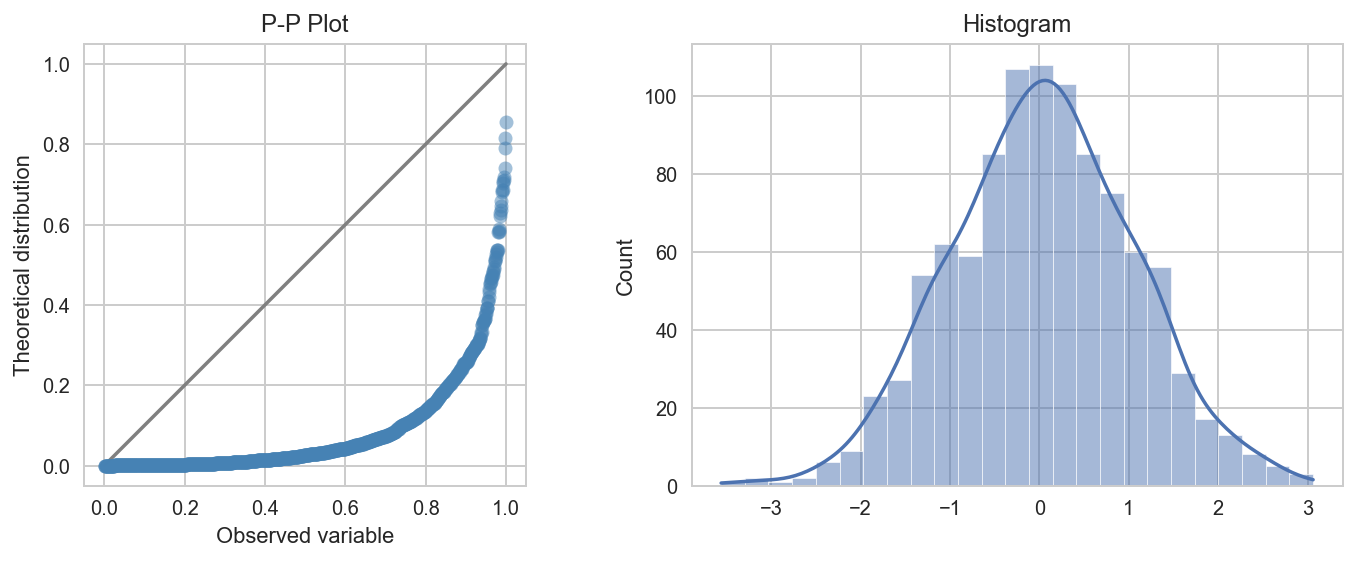

In [35]:
var = stats.norm(loc=0, scale=1).rvs(size=1000, random_state=8)
dist = stats.norm(loc=2, scale=1)
PPPlot(var, dist)

### Q-Q plot 

Similarity to P-P plot, Q-Q plot (quantile-quantile) is used to compare distribution by plotting their quantile agains each other. But Q-Q plot doesn't require loc and scale parameter and the reference line is based on location and scale of theoretical distribution. QQ plot is suitable for tails of distribution (when probabilty density is low)

In [36]:
def QQPlot(var, dist):
    # var = stats.zscore(var)
    var = np.sort(var)
    n = var.size
    cut = np.linspace(0, 1, n-1)
    quantileVar = np.quantile(var, q=cut)
    quantileDist = [stats.norm.ppf(q) for q in cut]
    
    fig, ax = plt.subplots(ncols=2, figsize=(10,4), tight_layout=True)
    
    ax[0].plot(quantileDist, quantileDist, 'grey')
    ax[0].plot(quantileVar, quantileDist, 'o', color='steelblue')
    ax[0].axis('scaled')
    ax[0].set_title('Q-Q Plot')
    ax[0].set_xlabel('Observed quantile')
    ax[0].set_ylabel('Theoretical quantile')
    
    ax[1] = sns.histplot(var, kde=True, edgecolor='w')
    ax[1].set_title('Histogram')
    
    plt.show()

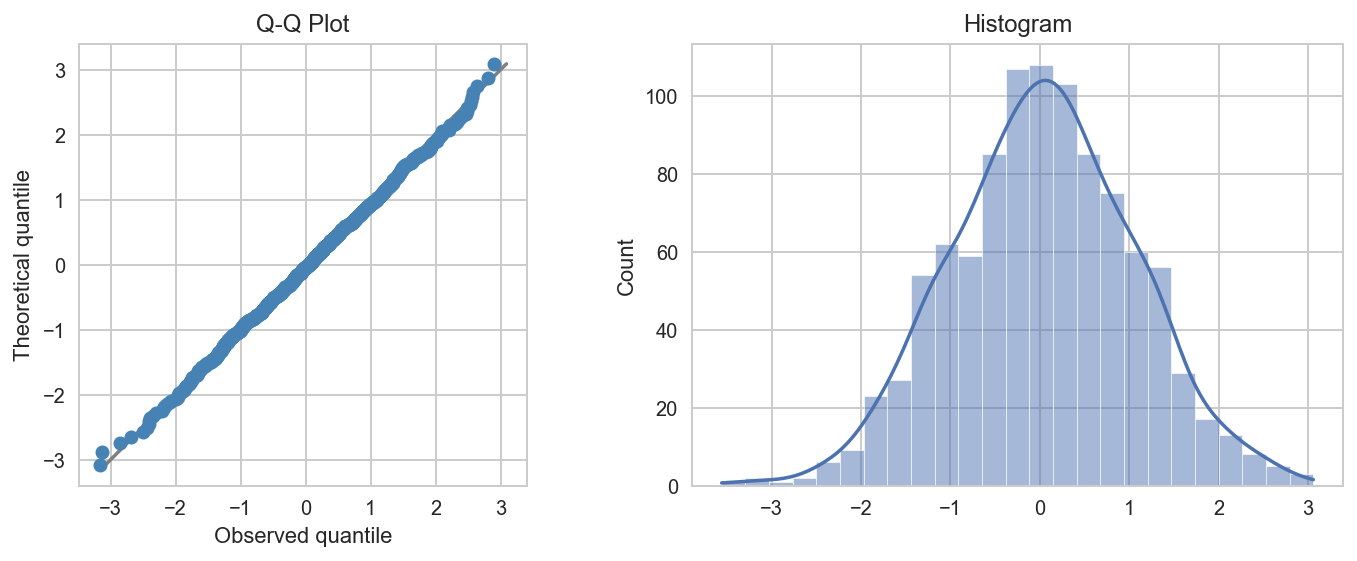

In [37]:
var = stats.norm(loc=0, scale=1).rvs(size=1000, random_state=8)
dist = stats.norm(loc=0, scale=1)
QQPlot(var, dist)

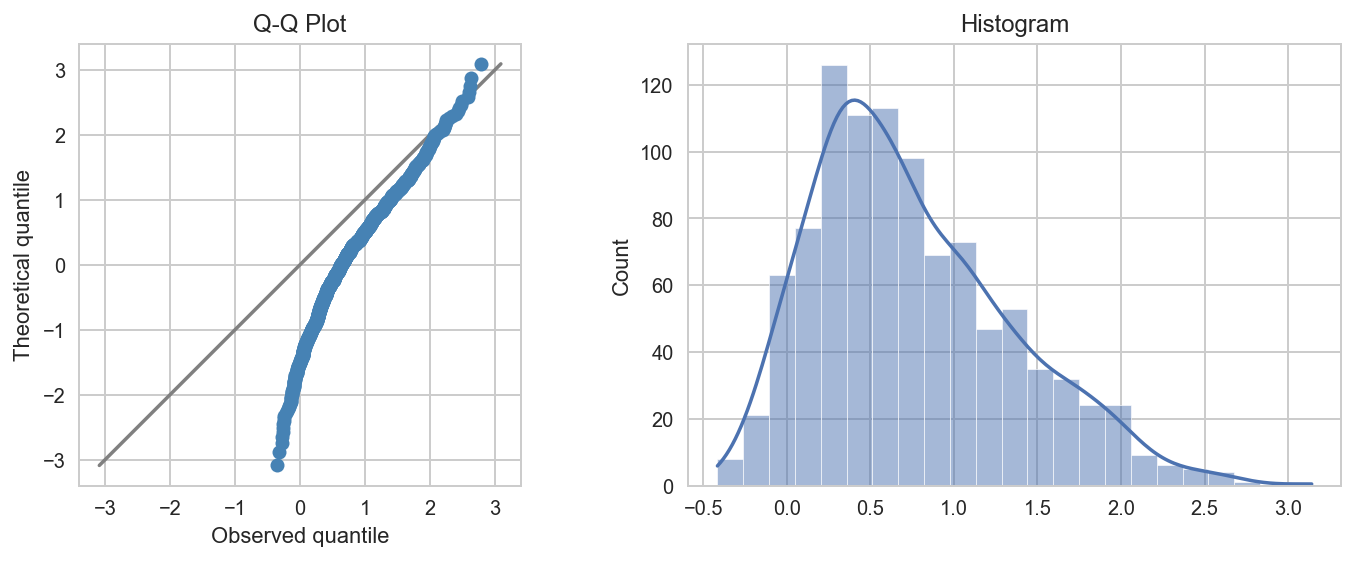

In [38]:
var = stats.skewnorm(a=5).rvs(size=1000, random_state=7)
dist = stats.norm(loc=2, scale=1)
QQPlot(var, dist)

# 2. Estimation 

In statistic, estimation is the process which calculates approximately the unknown parameters of population based on information of a sample. Population means and propotions are two common parameters in estimations


## 2.1. Point estimation 

 A point estimate of a population parameter is a single value of a statistic

### Method of moments

Simple idea of moments method is let the population moments are equal to expected sample moments.

- [Biased/unbiased estimation](https://en.wikipedia.org/wiki/Bias_of_an_estimator): the bias of an estimator is the difference between this estimator's expected value and the true value of the parameter being estimated. An estimator with zero bias is called unbiased. Statistic $\hat{\theta}$ of sample is called unbiased of parameter $\theta$ of population if: $E(\hat{\theta})=\theta$
- [Efficient estimation](https://en.wikipedia.org/wiki/Efficiency_(statistics)): Statistic $\hat{\theta}$ of sample is called most efficiency estimate if it is a unbiased estimator and it has the smallest variance between all unbiased estimators was build on the same sample
- [Robust estimation](https://en.wikipedia.org/wiki/Robust_statistics): In a large sample, if $\hat{\theta}$ converge to $\theta$ when $n \rightarrow \infty$ then it was called robust estimator

### Maximum likelihood

The idea of this method is estimating the unknown parameters which made the distribution best fit with the observed data. 

Assume we have $N$ observations $\mathbf{x} = (x_1, x_2, \dots ,x_N)$ that come with distribution $f$ and the vector of parameters $\mathbf{w}=(w_1, w_2,\dots, w_N)$. We have to find vector $\mathbf{w}$ to maximize the likelihood function $\hat{\mathbf{w}} = \arg\max L(\mathbf{w})$. The likelihood function is:

$$L(\mathbf{w}) = P(\mathbf{x}|\mathbf{w}) = P(x_1, x_2,\dots,x_N|\mathbf{w}) = \prod^N_{n=1} P(x_n|\mathbf{w})$$

To make the estimation of $\mathbf{w}$ easier, the log likelihood function is used in this case, then the parameters would be:

$$\log L(\mathbf{w})=\sum_{n=1}^N \log P(x_n|\mathbf{w})$$

In [39]:
import numpy as np
import pandas as pd
import scipy

<b style='color:navy'><i class="fa fa-book"></i>&nbsp; Case study</b><br>
Having the spending data of 100 customers in the table below. Assume that money is normal distributed with confidence level 95%. Point estimate for mean of spending of all customer.

In [40]:
df = pd.DataFrame({'spend':[10,14,18,22,26,30,34],
                  'num_cus': [3,9,25,29,21,7,6]})
df

,spend,num_cus
0,10,3
1,14,9
2,18,25
3,22,29
4,26,21
5,30,7
6,34,6


In [41]:
df['sale'] = df['spend'] * df['num_cus']

df.sale.sum() / df['num_cus'].sum()

22.04

## 2.2. Interval estimation 
An interval estimate is defined by two numbers, which the statistic lies between. The interval estimation of a statistic $\theta$ is found in the [confidence interval](https://en.wikipedia.org/wiki/Confidence_interval) $(\theta_1,\theta_2)$ where the probability that the statistic lies within the that interval is large enough to trust the result.

$$P(\theta_1<\theta<\theta_2)=1-\alpha$$

where:
- $\alpha$ is the significance level and $\gamma=1-\alpha$ is the confidence level
- $\theta_1$ and $\theta_2$ are lower and upper bounds, they are estimated base on a specific distribution

In [42]:
import numpy as np
from scipy import stats

### Mean estimation
When estimating the mean of a large sample, the critical value follows a standard normal distribution: $c\sim\mathcal{N}(0,1)$. However when the the sample size is too small ($N\leq30$), a  t-distribution with $N-1$ degree of freedom is used instead to make sample variance closer to population variance: $c\sim\text{t}(N-1)$.

$$
\hat{\mu}-\epsilon
<\mu<
\hat{\mu}+\epsilon
\qquad\text{for }\epsilon=c_{\alpha/2}\frac{\hat{\sigma}}{\sqrt{N}}
$$

When estimating the difference in means of two samples (they should be large enough), we simply extend the previous case:

$$
(\hat{\mu}_1-\hat{\mu}_2)-\epsilon
<\mu_1-\mu_2<
(\hat{\mu}_1-\hat{\mu}_2)+\epsilon
\qquad\text{for }\epsilon=c_{\alpha/2}\sqrt{\frac{\hat{\sigma}_1^2}{N_1}+\frac{\hat{\sigma}_2^2}{N_2}}
$$

<b style='color:navy'><i class="fa fa-book"></i>&nbsp; Case study</b><br>
$20$ book stores have their mean of book price $135.8$ USD and variance $23.2$. With the confidence level of $95\%$, what is the range that market price of book should be in?

In [43]:
alpha = 0.05
gamma = 1 - alpha
n, mean, var = 20, 135.8, 23.2

# instead of looking at the t table, we use Scipy to compute the critical value
crit = stats.t(n-1).isf(alpha/2)
eps = crit * np.sqrt(var/n)
lower = mean - eps
upper = mean + eps

print(f'{gamma:.0%} confidence interval is ({lower:.2f}, {upper:.2f})')

95% confidence interval is (133.55, 138.05)


<b style='color:navy'><i class="fa fa-book"></i>&nbsp; Case study</b><br>
A random sample of $120$ students yields mean GPA $2.71$ with standard deviation $0.43$. Construct a $90\%$ confidence interval for mean GPA of all students in that university.

In [44]:
gamma = 0.9
alpha = 1 - gamma
n, mean, std = 120, 2.71, 0.43

crit = stats.norm().isf(alpha/2)
eps = crit * std / np.sqrt(n)
lower = mean - eps
upper = mean + eps

print(f'{gamma:.0%} confidence interval is ({lower:.2f}, {upper:.2f})')

90% confidence interval is (2.65, 2.77)


### Proportion estimation
When estimating the proportion of a population given sample proportion ($\hat{p}$), we use a critical value follows a standard normal distribution: $c\sim\mathcal{N}(0,1)$

$$
\hat{p}-\epsilon
<p<
\hat{p}+\epsilon
\qquad\text{for }\epsilon=c_{\alpha/2}\sqrt{\frac{\hat{p}(1-\hat{p})}{N}}
$$

Like interval estimation for mean, we can also extend proportion estimation for the case of two samples:

$$
(\hat{p}_1-\hat{p}_2)-\epsilon
<p_1-p_2<
(\hat{p}_1-\hat{p}_2)+\epsilon
\qquad\text{for }\epsilon=c_{\alpha/2}\sqrt{\frac{\hat{p}_1(1-\hat{p}_1)}{N_1}+\frac{\hat{p}_2(1-\hat{p}_2)}{N_2}}
$$

<b style='color:navy'><i class="fa fa-book"></i>&nbsp; Case study</b><br>
To estimate the proportion of students at a large college who are female, a random sample of $N=120$ students is selected. There are $69$  female students in the sample. Construct a $90\%$  confidence interval for the proportion of all students at the college who are female.

In [45]:
gamma = 0.9
alpha = 1-gamma
n, p = 120, 69/120

crit = stats.norm().isf(alpha/2)
eps = crit * np.sqrt(p * (1-p) / n)
lower = p - eps
upper = p + eps

print(f'{gamma:.0%} confidence interval is ({lower:.2f}, {upper:.2f})')

90% confidence interval is (0.50, 0.65)


### Variance estimation
When estimating population variance, the critical value follows a chi-squared distribution with $N-1$ degrees of freedom: $c\sim\chi^2(N-1)$.

$$
\frac{N-1}{c_{\alpha/2}}\hat{\sigma}^2
<\sigma^2<
\frac{N-1}{c_{1-\alpha/2}}\hat{\sigma}^2
$$

To estimate the ratio of two variances, we use a critical value that follows an F-distribution with $N-1$ and $N-2$ degrees of freedom: $c\sim \text{F}(N_1-1,N_2-1)$.

$$
\frac{1}{c_{\alpha/2}}\frac{\hat{\sigma}_1^2}{\hat{\sigma}_2^2}
<\frac{\sigma_1^2}{\sigma_2^2}<
c_{\alpha/2}\frac{\hat{\sigma}_1^2}{\hat{\sigma}_2^2}
$$

<b style='color:navy'><i class="fa fa-book"></i>&nbsp; Case study</b><br>
A candy company targets to produces candy packs of exactly $52$ grams. In attemp to estimate the variance of all packs, a quality control manager takes a random sample of $10$ packs, it yields the variance of $4.2$. Use that sample to derive a $95\%$ confidence interval for $\sigma$.

In [46]:
gamma = 0.95
alpha = 1 - gamma
n, var = 10, 4.2

dist = stats.chi2(n-1)
crit1, crit2 = dist.isf(alpha/2), dist.isf(1-alpha/2)
lower = (n-1) * var / crit1
upper = (n-1) * var / crit2

# confidence interval for standard deviation
lower, upper = np.sqrt(lower), np.sqrt(upper)

print(f'{gamma:.0%} confidence interval is ({lower:.2f}, {upper:.2f})')

95% confidence interval is (1.41, 3.74)


<b style='color:navy'><i class="fa fa-book"></i>&nbsp; Case study</b><br>
Two spider species, deinopis and menneus, coexist in eastern Australia. Collect a sample of $10$ preys for each species, we obtained the standard deviations of prey size (in millimeters) are $2.51$ and $1.9$, respectively. Estimate, with $95\%$ confidence, the ratio of two population variances.

In [47]:
gamma = 0.95
alpha = 1 - gamma
n1, var1 = 10, 2.51**2
n2, var2 = 10, 1.9**2

crit = stats.f(n1-1, n2-1).isf(alpha/2)
lower = var1 / var2 / crit
upper = var1 / var2 * crit

print(f'{gamma:.0%} confidence interval is ({lower:.2f}, {upper:.2f})')

95% confidence interval is (0.43, 7.03)


# 3. Statistical models

## 3.1. Binary dependent regression
If we use linear function with probability is dependent variable, this will not restrict $P$ to lie between 0 and 1. Then we need to use a *nonlinear function* to model the conditional probability function of a binary dependent variable. Commonly used methods are Probit and Logit regression.

### Logit model
Logistic model is used to describe the probability of a certain class such as true/false, good/bad,.... The difference between logistic and linear regression is the output of logistic is limited in $(0,1)$. Logistic function is the CDF of logistically distribution:

$$p = \frac{1}{1+\exp{(-(\beta_0+\beta_1x))}}$$ 

- $p$: probability of 1 class
- $\beta_0, \beta_1,\dots$: model parameters

Logistic function can be rewritten to *logit function*:
$$\log\left(\frac{p}{1-p}\right) = \beta_0+\beta_1x$$

where $\dfrac{p}{1-p}$ is called the odds ratio. Logit model in statistic doesn't show the effect of independent variable $x$ on $y$, it considers the influence of $x$ on the probability to $y$ get the values 1 (expected value of $y$).

### Probit model
In probit model, the CDF of standard normal distribution is used to model the regression:

$$P(Y=1\vert X) = \Phi(\beta_0 + \beta_1 X_1 + \dots + \beta_k X_k)$$

- $\Phi$: The CDF of standard normal distribution
- $\beta_0 + \beta_1 X + \dots + \beta_k X_k$: quantile $z^*$ where $\Phi(z^*) = P(Z \leq z^*) \ , \ Z \sim \mathcal{N}(0,1)$


The coefficient $\beta_j$ of probit model have the same meaning with logit model.

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn', 'seaborn-whitegrid'])
import statsmodels.tools as sm
from statsmodels.discrete.discrete_model import Logit, Probit
%config InlineBackend.figure_format = 'retina'

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [49]:
df = pd.read_csv('data/logit_dataset.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/logit_dataset.csv'

In [3]:
y = df['labor_join']
x = df.drop(columns=['labor_join'])

In [4]:
x = sm.add_constant(x)
logit = Logit(y, x)

logit.fit().summary()

Optimization terminated successfully.
         Current function value: 0.601106
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             labor_join   No. Observations:                  753
Model:                          Logit   Df Residuals:                      745
Method:                           MLE   Df Model:                            7
Date:                Wed, 10 Aug 2022   Pseudo R-squ.:                  0.1209
Time:                        10:46:13   Log-Likelihood:                -452.63
converged:                       True   LL-Null:                       -514.87
Covariance Type:            nonrobust   LLR p-value:                 8.923e-24
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.1821      0.644      4.938      0.000       1.919       4.445
chil5          -1.4629      0.197     -7.426      0.000      -1.849      -1.077
chil618        -0.0646      0.068     -0.950      0.342      -0.198       0.069
age            -0.0629      0.013     -4.918      0.000      -0.088      -0.038
wif_college     0.8073      0.230      3.510      0.000       0.357       1.258
hus_college     0.1117      0.206      0.542      0.588      -0.292       0.516
log_wage        0.6047      0.151      4.009      0.000       0.309       0.900
fam_income     -0.0344      0.008     -4.196      0.000      -0.051      -0.018
===============================================================================
"""

Optimization terminated successfully.
         Current function value: 0.601106
         Iterations 6


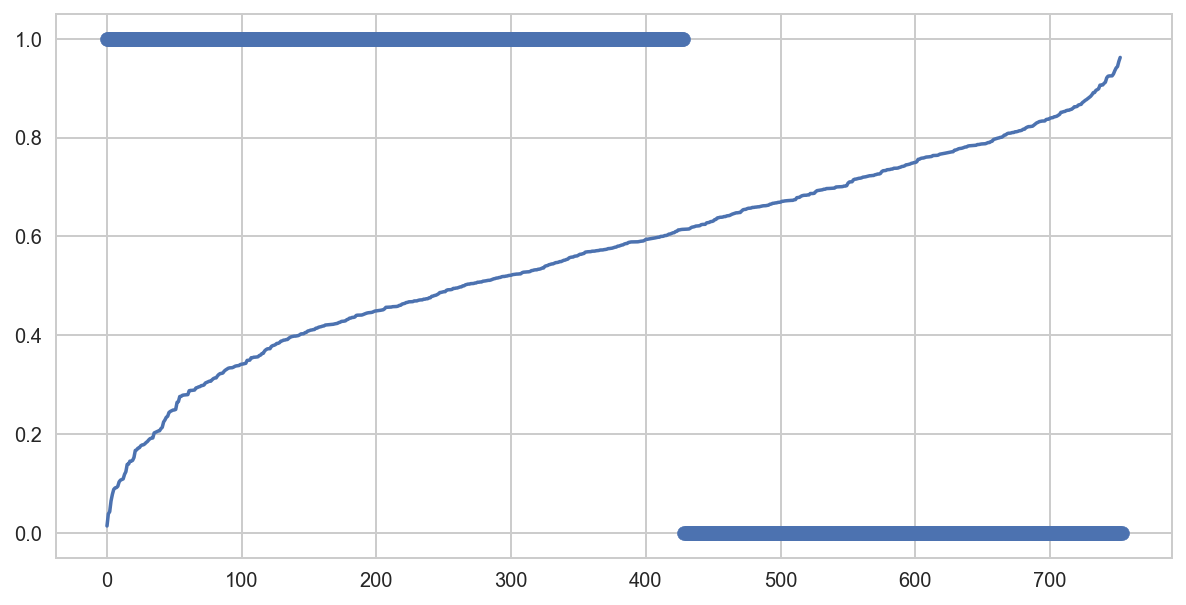

In [12]:
y_pred = logit.fit().predict(x)
plt.figure(figsize=(10,5))
plt.plot(sorted(y_pred))
plt.scatter(np.linspace(0,753,753), y)
plt.show()

In [41]:
probit = Probit(y, x)
probit.fit().summary()

Optimization terminated successfully.
         Current function value: 0.601189
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:             labor_join   No. Observations:                  753
Model:                         Probit   Df Residuals:                      745
Method:                           MLE   Df Model:                            7
Date:                Sun, 25 Jul 2021   Pseudo R-squ.:                  0.1208
Time:                        19:49:46   Log-Likelihood:                -452.69
converged:                       True   LL-Null:                       -514.87
Covariance Type:            nonrobust   LLR p-value:                 9.471e-24
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.9184      0.381      5.040      0.000       1.172       2.664
chil5          -0.8747      0.114     -7.703      0.000      -1.097      -0.652
chil618        -0.0386      0.040     -0.953      0.340      -0.118       0.041
age            -0.0378      0.008     -4.971      0.000      -0.053      -0.023
wif_college     0.4883      0.135      3.604      0.000       0.223       0.754
hus_college     0.0572      0.124      0.461      0.645      -0.186       0.300
log_wage        0.3656      0.088      4.165      0.000       0.194       0.538
fam_income     -0.0205      0.005     -4.297      0.000      -0.030      -0.011
===============================================================================
"""

In [42]:
probit.fit().predict(x)

Optimization terminated successfully.
         Current function value: 0.601189
         Iterations 5


0      0.520697
1      0.665092
2      0.464379
3      0.659372
4      0.665338
         ...   
748    0.755185
749    0.183754
750    0.660005
751    0.338742
752    0.522859
Length: 753, dtype: float64

## 3.2. Panel data regression
Panel data is the combination of time-series and cross-section data. Panel data is required when we want to analyse the unobserved variables which effects to dependent variable. There are 2 models to analyse panel data: *fixed effects regression* and *random effects regression*

### Fixed effects model
Fix effects regression:

$$Y_{it} = \beta_0 + \beta_1 X_{it} + \beta_2 Z_i +  u_{it}$$

- $Y_{it}$: dependent variable
- $X_{it}$: independent variable
- $Z_i$: unobserved variable - which different between objects but unchange across the time. 

Setting $\alpha_i = \beta_0 + \beta_2 Z_i$ results:

$$Y_{it} = \beta_1 X_{1,it} + \cdots + \beta_k X_{k,it} + \alpha_i + u_{it}$$


### Random effects model

Random effects model is a special case of fixed effects model. The function is the same as fixed effects model but the unobserved variable is difference.

$$Y_{it} = \beta_1 X_{1,it} + \cdots + \beta_k X_{k,it} + \alpha_i + u_{it}$$

With $\alpha_i$ is representative for the factors which unobserved and change between objects but unchange across the time.

# References
- *online.stat.psu.edu - [Introduction to Mathematical Statistics](https://online.stat.psu.edu/stat415/section/6)*

---
*&#9829; By Quang Hung x Thuy Linh &#9829;*